In [3]:
import torch as torch
from network.metric.accuracy import acc_srcnn_tiny_radar
from network.metric.loss import LossFunctionSRCnnTinyRadarNN, LossFunctionTinyRadarNN
from network.metric.metric_tracker import AccuracyMetric, LossMetricSRCnnTinyRadarNN
from network.models.classifiers.tiny_radar import TinyRadarNN
from network.models.sr_classifier.SRCnnTinyRadar import CombinedSRCNNClassifier
from network.models.super_resolution.drln import DRLN
from network.models.super_resolution.srcnn import SRCnn
from network.runner import Runner
from utils.utils_paths import get_time_in_string

import numpy as np

ModuleNotFoundError: No module named 'python'

In [3]:
from enum import Enum, auto

import numpy as np


class Normalization(Enum):
    NONE = auto()
    Range_0_1 = auto()
    Range_neg_1_1 = auto()
a = Normalization.NONE
print(str(Normalization.NONE).lower())

normalization.none


In [6]:
a.name

'NONE'

In [ ]:
def pixel_range(img, desc):
    min_val = img.min()
    max_val = img.max()
    print(desc + f" pixel range: [{min_val} , {max_val}]")

def plot_img(img, desc):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.title(desc)
    plt.show()

def nom_img(imgs):
    for i in range(imgs.shape[0]):
        for j in range(imgs.shape[1]):
            for k in range(imgs.shape[2]):
                img = imgs[i,j,k,:,:]
                img_max = img.max()
                imgs[i,j,k,:,:] = 2*(img/img_max)-1
    return imgs




SRCNN - TinyRadarNN results - 

In [ ]:
low_res_path = "/Users/netanelblumenfeld/Desktop/data/11G/_row_4_col_4_d_none_u_cubic/p2/PinchPinky_1s_wl32_doppl.npy"
hight_res_path = "/Users/netanelblumenfeld/Desktop/data/11G/data_feat/p2/PinchPinky_1s_wl32_doppl.npy"
low_res_imgs = torch.Tensor(np.load(low_res_path)[:8])
hight_res_imgs = torch.Tensor(np.load(hight_res_path)[:8])
# low_res_imgs = low_res_imgs.permute(1, 0, 4, 2, 3)
# low_res_imgs = nom_img(low_res_imgs)
# hight_res_imgs = hight_res_imgs.permute(1, 0, 4, 2, 3)
# hight_res_imgs = nom_img(hight_res_imgs)

print(low_res_imgs.shape)

torch.Size([8, 5, 32, 492, 2])


In [ ]:
# Dataset parameters
numberOfTimeSteps = 5
numberOfSensors = 2
numberOfRangePointsPerSensor = 492
lengthOfSubWindow = 32
numberOfGestures = 12
tiny_radar = TinyRadarNN(
    numberOfSensors,
    numberOfRangePointsPerSensor,
    lengthOfSubWindow,
    numberOfTimeSteps,
    numberOfGestures,)

low res pixel range: [-0.9999547600746155 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.0311343669891357 , 1.3812867403030396]


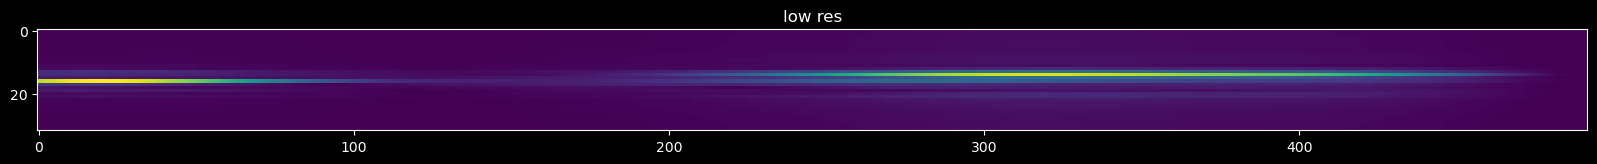

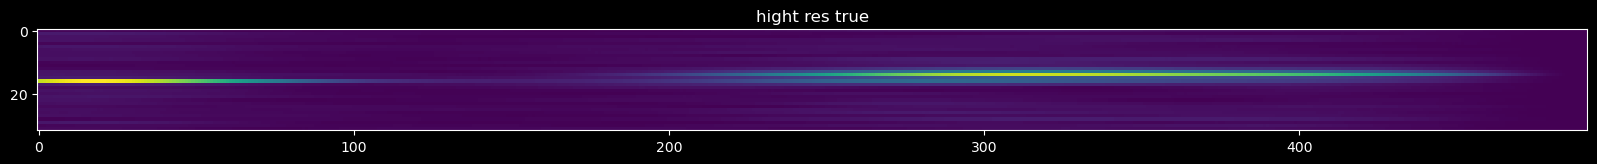

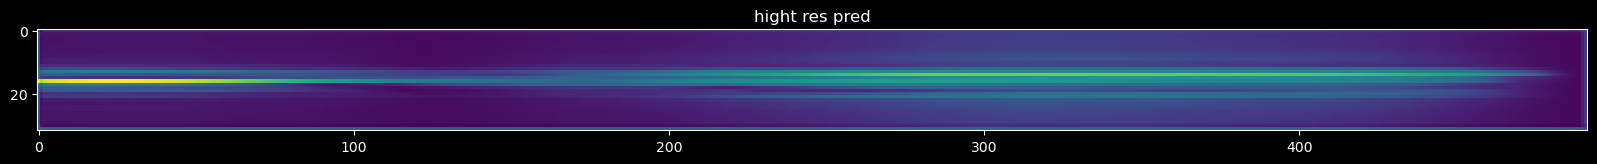

In [ ]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="leaky_relu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir, map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

low res pixel range: [-0.9999747276306152 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.816809892654419 , 2.0]


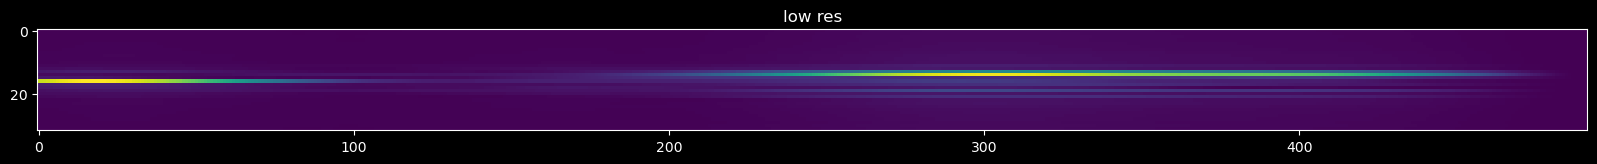

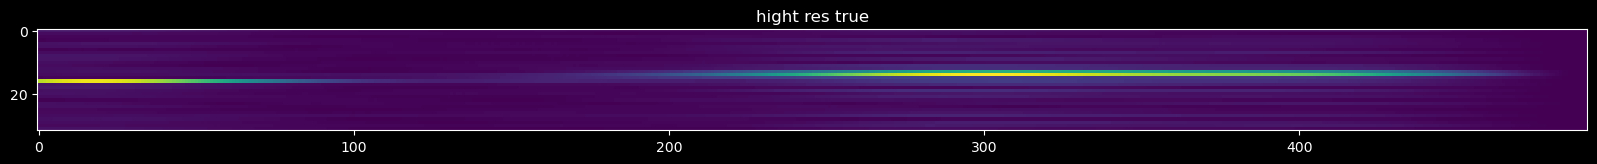

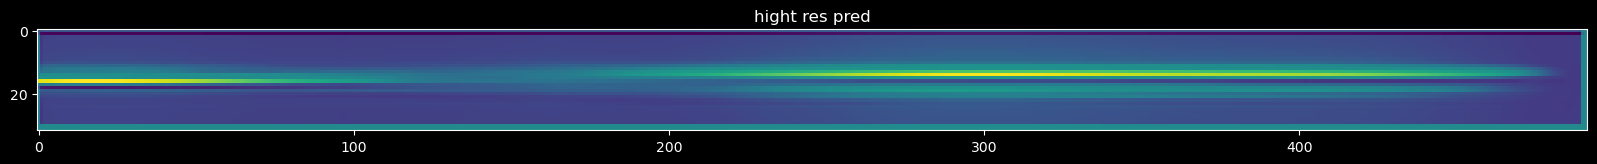

In [ ]:
# L1 Loss, leaky relu and in the end than pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="leaky_relu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1_than/time_2023-12-19_18:43:33/min_loss_model.pt"
model.load_state_dict(torch.load(saved_model_dir, map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[1,0,0,:,:]
higit_res_img_true = hight_res_imgs[1,0,0,:,:]
higit_res_img_pred = res_imgs[1,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

low res pixel range: [-0.9999547600746155 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.9999535083770752 , 1.90800142288208]


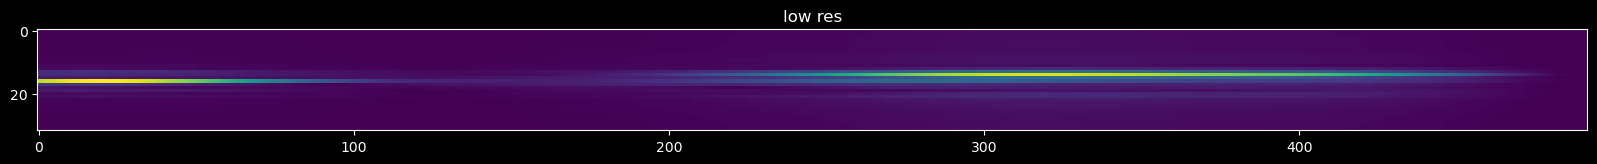

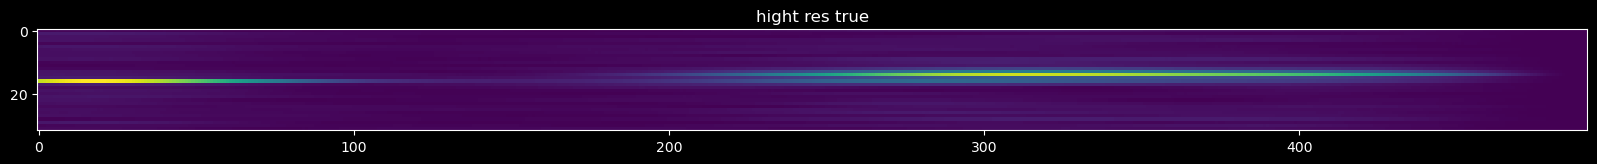

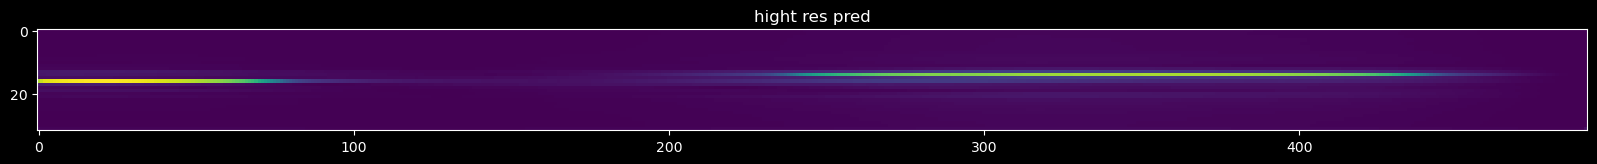

In [ ]:
# L1 Loss, leaky relu pixel range 0,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="leaky_relu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu/time_2023-12-19_12:13:19/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir, map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

In [5]:
import numpy as np
np.linalg.norm(higit_res_img_true-higit_res_img_pred)

NameError: name 'higit_res_img_true' is not defined

In [9]:
from enum import Enum, auto
class Activation(Enum):
    LEAKY_RELU = auto()
    RELU = auto()
    SIGMOID = auto()
    TANH = auto()

In [11]:
str(Activation.RELU)

'Activation.RELU'